#  Neural Networks

In Jupyter Notebook or Google Colab,  
by default, only the last expression in a cell will be displayed.  
x = 10  
y = 20  
x  # Only 10 will be displayed, y won't be printed  
y


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
# Setting IPython Interactive Mode
# "all" allows all expressions in a cell to be displayed, not just the last one.
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# for numerical computations and matrix operations
import numpy as np
# plotting library
import matplotlib.pyplot as plt
# a Python machine learning library - provides various built-in datasets
from sklearn import datasets

## We'll be using the digits data set that comes with sci-kit learn

In [ ]:
# Loading the Handwritten Digits Dataset
digits = datasets.load_digits()
# list all attributes
dir(digits)
print('\n')
print(type(digits.images))
print('\n')
print(type(digits.target))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']



<class 'numpy.ndarray'>


<class 'numpy.ndarray'>


import numpy as np  
arr1 = np.array([1, 2, 3, 4])  # 1D array  
arr2 = np.array([[1], [2], [3], [4]])  # 2D array  

print(arr1.shape)  # output (4,)
print(arr2.shape)  # output (4, 1)

In [ ]:
# 1797 samples, each sample is an 8×8 pixel matrix
digits.images.shape
print('\n')
digits.data.shape
print('\n')
digits.target.shape

(1797, 8, 8)

(1797, 64)

(1797,)

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
# digits.data is just the flattened version of digits.images
# ML need Fixed shape feature matrix, Works with classification algorithms
# Deep Learning like TensorFlow/Keras don't need flatting, use 8*8 directly.
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

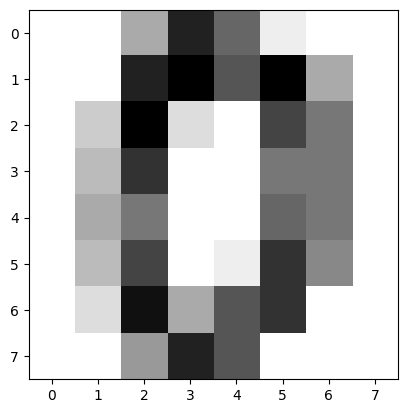

In [ ]:
plt.imshow(digits.images[0],cmap='binary')
plt.show()

In [ ]:
digits.target[0]

0

### Our neural network will have an input layer of 64 nodes, one for each pixel.  We will have 10 output nodes, one for each digit.  Finally, we will have a hidden layer, with 20 nodes.

In [ ]:
X = digits.data
# One label per sample, digit 0-9
Y = digits.target

In [ ]:
X.shape
print('\n')
Y.shape

(1797, 64)

(1797,)

In [ ]:
X_train = X[:900]
Y_train = Y[:900]
X_test = X[900:]
Y_test = Y[900:]


*   hidden_layer_sizes=(20, 10), means there are two hidden layers, with 20 and 10 neurons, respectively.  

*   Sigmoid function (σ(x) = 1 / (1 + e^(-x))), suitable for binary classification or simple neural networks.    

 relu' → Better for deep learning since it helps reduce vanishing gradient issues.
*   L2 regularization coefficient, helps prevent overfitting.
*   'adam' → Works well for most tasks, adjusts the learning rate automatically, often better than sgd.  
 'lbfgs' → Works well for small datasets, converges quickly.

*   Higher learning rate → Faster training but potentially unstable.  
Lower learning rate → More stable training but slower convergence.

In [ ]:
from sklearn.neural_network import MLPClassifier
# Feedforward Neural Network, suitable for classification tasks.
# Multi-layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=(20,), # one hidden layer with 20 neurons
                    activation='logistic',
                    alpha=0, # no regularization
                    solver='sgd', # Optimization algorithm, 随机梯度下降, Stochastic Gradient Descent
                    tol=1e-4, # If the improvement in loss is less than 1e-4, training stops automatically.
                    random_state=1, # Ensures reproducibility of results.
                    learning_rate_init=.1, # Initial learning rate, controls the step size for parameter updates:
                    verbose=True) # Prints loss values at each iteration during training to monitor the process.

In [ ]:
# The loss value decreases over iterations, indicating the model is converging.
mlp.fit(X_train, Y_train)

Iteration 1, loss = 2.19346770
Iteration 2, loss = 1.76898619
Iteration 3, loss = 1.39477456
Iteration 4, loss = 1.06425257
Iteration 5, loss = 0.77847516
Iteration 6, loss = 0.58040781
Iteration 7, loss = 0.43889990
Iteration 8, loss = 0.34620403
Iteration 9, loss = 0.27661430
Iteration 10, loss = 0.23708077
Iteration 11, loss = 0.19677611
Iteration 12, loss = 0.17579259
Iteration 13, loss = 0.15339128
Iteration 14, loss = 0.13706818
Iteration 15, loss = 0.12597246
Iteration 16, loss = 0.11423089
Iteration 17, loss = 0.10445651
Iteration 18, loss = 0.09826096
Iteration 19, loss = 0.09242567
Iteration 20, loss = 0.08764589
Iteration 21, loss = 0.08055123
Iteration 22, loss = 0.07708989
Iteration 23, loss = 0.07233710
Iteration 24, loss = 0.06890764
Iteration 25, loss = 0.06581836
Iteration 26, loss = 0.06332592
Iteration 27, loss = 0.06028401
Iteration 28, loss = 0.05717590
Iteration 29, loss = 0.05464853
Iteration 30, loss = 0.05226281
Iteration 31, loss = 0.05059135
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0, hidden_layer_sizes=(20,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

In [ ]:
predictions = mlp.predict(X_test)
predictions

array([4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8,
       9, 8, 4, 1, 5, 7, 3, 9, 1, 2, 5, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3,
       4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1,
       4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 2, 4, 0, 5, 3, 6, 9, 6, 1, 7,
       5, 4, 4, 7, 2, 8, 2, 2, 9, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5,
       1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9, 9, 1,
       5, 0, 9, 5, 2, 8, 3, 0, 0, 1, 7, 6, 3, 2, 1, 5, 4, 6, 3, 8, 8, 9,
       1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8,
       2, 2, 5, 7, 9, 5, 4, 7, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
       9, 5, 9, 5, 5, 6, 5, 0, 9, 8, 9, 5, 4, 1, 7,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predictions)

0.9342251950947603

**Optimization**


Iteration 1, loss = 2.42790929
Validation score: 0.236111
Iteration 2, loss = 2.08089325
Validation score: 0.465278
Iteration 3, loss = 1.80756138
Validation score: 0.590278
Iteration 4, loss = 1.56831363
Validation score: 0.694444
Iteration 5, loss = 1.34758311
Validation score: 0.770833
Iteration 6, loss = 1.14259220
Validation score: 0.812500
Iteration 7, loss = 0.95850904
Validation score: 0.854167
Iteration 8, loss = 0.79865970
Validation score: 0.888889
Iteration 9, loss = 0.66607704
Validation score: 0.902778
Iteration 10, loss = 0.55835683
Validation score: 0.902778
Iteration 11, loss = 0.47044611
Validation score: 0.916667
Iteration 12, loss = 0.40107846
Validation score: 0.923611
Iteration 13, loss = 0.34406553
Validation score: 0.937500
Iteration 14, loss = 0.29856026
Validation score: 0.937500
Iteration 15, loss = 0.26110563
Validation score: 0.937500
Iteration 16, loss = 0.23030516
Validation score: 0.930556
Iteration 17, loss = 0.20524122
Validation score: 0.930556
Iterat

MLPClassifier(early_stopping=True, hidden_layer_sizes=(64, 32), random_state=1,
              verbose=True)

Accuracy: 0.9555555555555556
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.90      1.00      0.95        36
           2       1.00      0.97      0.99        35
           3       0.97      0.95      0.96        37
           4       0.94      0.92      0.93        36
           5       1.00      0.97      0.99        37
           6       0.95      1.00      0.97        36
           7       0.97      0.94      0.96        36
           8       0.94      0.86      0.90        35
           9       0.90      0.97      0.93        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

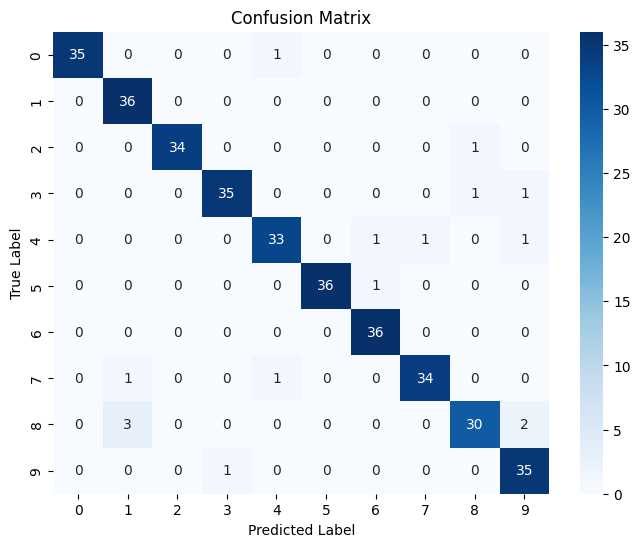

In [ ]:
# 导入必要的库 (Import necessary libraries)
from sklearn.neural_network import MLPClassifier  # 多层感知机 (MLP)
from sklearn.model_selection import train_test_split  # 数据集划分工具
from sklearn.preprocessing import StandardScaler  # 标准化数据 (Normalization)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # 评估指标
import matplotlib.pyplot as plt  # 数据可视化
import seaborn as sns  # 画混淆矩阵热图

# 1. 数据集划分 (Splitting the dataset)
# 使用 train_test_split 自动划分数据集，避免手动切分数据导致的偏差
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,  # X: 特征数据, Y: 目标标签
    test_size=0.2,  # 20% 用作测试集, 80% 用作训练集
    stratify=Y,  # 确保训练集和测试集中每个类别的比例一致 (保持数据分布平衡)
    random_state=1  # 固定随机种子, 确保结果可复现
)

# 2. 归一化数据 (Normalizing the data)
# 由于 MLP 对输入数据的数值范围敏感，我们使用 StandardScaler 进行标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # 计算训练数据的均值和标准差，并进行归一化
X_test = scaler.transform(X_test)  # 使用相同的均值和标准差标准化测试数据，防止数据分布不同

# 3. 定义 MLP 神经网络模型 (Defining the MLP Neural Network Model)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # 设置两层隐藏层, 第一层64个神经元, 第二层32个神经元
    activation='relu',  # 使用 ReLU 激活函数, 避免 sigmoid 造成的梯度消失问题
    solver='adam',  # Adam 优化器, 适用于大部分任务, 比 SGD 收敛更快
    alpha=1e-4,  # L2 正则化系数, 防止过拟合 (类似于 Ridge Regression)
    learning_rate_init=0.001,  # 初始学习率, 适当降低学习率, 训练更稳定
    random_state=1,  # 设置随机种子, 保持实验结果可复现
    early_stopping=True,  # 训练过程中, 如果验证集 loss 10 轮内没有改善, 提前停止训练, 防止过拟合
    validation_fraction=0.1,  # 使用 10% 的训练数据作为验证集, 监测模型性能
    verbose=True  # 训练过程中打印 loss 值, 便于观察训练情况
)

# 4. 训练模型 (Training the Model)
# 让 MLP 在训练集上进行训练
mlp.fit(X_train, Y_train)

# 5. 进行预测 (Making Predictions)
# 使用训练好的模型在测试集上进行预测
predictions = mlp.predict(X_test)

# 6. 计算分类准确率 (Calculating Accuracy)
accuracy = accuracy_score(Y_test, predictions)  # 计算模型的整体准确率
print("Accuracy:", accuracy)  # 输出准确率

# 7. 生成分类报告 (Generating Classification Report)
# 计算 precision(精确率), recall(召回率), F1-score, 适用于多分类问题
print("Classification Report:")
print(classification_report(Y_test, predictions))

# 8. 计算混淆矩阵 (Computing Confusion Matrix)
cm = confusion_matrix(Y_test, predictions)  # 计算混淆矩阵

# 9. 可视化混淆矩阵 (Visualizing the Confusion Matrix)
plt.figure(figsize=(8,6))  # 设置画布大小
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # 画热力图, 显示分类正确和错误的情况
plt.xlabel("Predicted Label")  # X轴标签: 预测值
plt.ylabel("True Label")  # Y轴标签: 真实值
plt.title("Confusion Matrix")  # 图表标题
plt.show()  # 显示图表
